In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy.fftpack import fftn, ifftn, fftshift

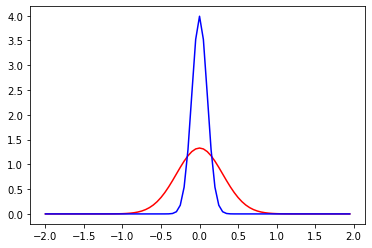

In [7]:
x = np.arange(-2,2,0.05)

# parameter sigma is related to the dispersion of the values
sigma1 = 0.3
gauss1d_1 = (1/(sigma1*np.sqrt(2*np.pi))) * np.exp(-(np.square(x/sigma1)/2))

sigma2 = 0.1
gauss1d_2 = (1/(sigma2*np.sqrt(2*np.pi))) * np.exp(-(np.square(x/sigma2)/2))

plt.plot(x, gauss1d_1, 'r') # larger sigma, 0.3
plt.plot(x, gauss1d_2, 'b') # smaller sigma, 0.1

In [8]:
def gaussian_filter(k=5, sigma=1.0):
    ''' Gaussian filter
    :param k: defines the lateral size of the kernel/filter, default 5
    :param sigma: standard deviation (dispersion) of the Gaussian distribution
    :return matrix with a filter [k x k] to be used in convolution operations
    '''
    arx = np.arange((-k // 2) + 1.0, (k // 2) + 1.0)
    x, y = np.meshgrid(arx, arx)
    filt = np.exp(-(1/2) * (np.square(x) + np.square(y)) / np.square(sigma))
    return filt / np.sum(filt)


In [10]:

g1 = gaussian_filter(k=5, sigma=0.9)
print(g1)

[[0.00141805 0.00903528 0.01675038 0.00903528 0.00141805]
 [0.00903528 0.05756927 0.10672687 0.05756927 0.00903528]
 [0.01675038 0.10672687 0.19785944 0.10672687 0.01675038]
 [0.00903528 0.05756927 0.10672687 0.05756927 0.00903528]
 [0.00141805 0.00903528 0.01675038 0.00903528 0.00141805]]


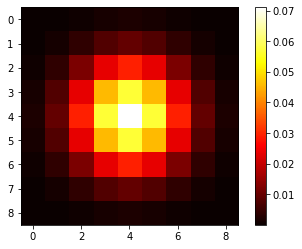

In [11]:
g2 = gaussian_filter(k=9, sigma=1.5)
plt.imshow(g2, cmap='hot', interpolation='nearest')
plt.colorbar()


Text(0.5, 1.0, 'degraded/blurred image')

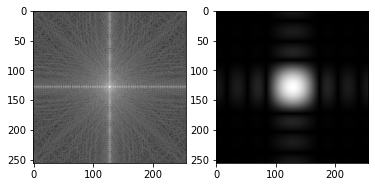

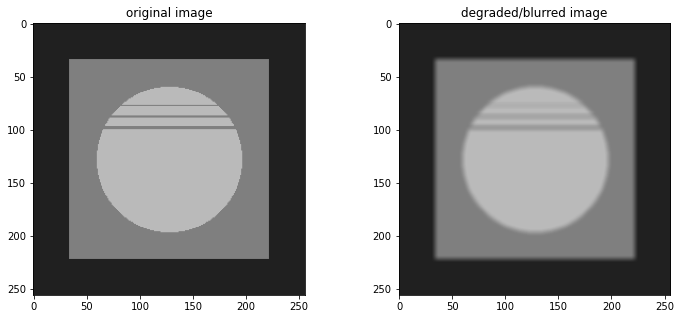

In [13]:
f = imageio.imread("pattern2.png")
h = gaussian_filter(k=7, sigma=2.5)

# computing the number of padding on one side
a = int(f.shape[0]//2 - h.shape[0]//2)
h_pad = np.pad(h, (a,a-1), 'constant', constant_values=(0))

# computing the Fourier transforms
F = fftn(f)
H = fftn(h_pad)

plt.subplot(121)
plt.imshow(fftshift(np.log(np.abs(F)+1)), cmap="gray")
plt.subplot(122)
plt.imshow(fftshift(np.log(np.abs(H)+1)), cmap="gray")

# convolution
G = np.multiply(F,H)

# Inverse Transform
# - we have to perform FFT shift before reconstructing the image in the space domain
g = fftshift(ifftn(G).real)

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(f, cmap="gray", vmin=0, vmax=255); plt.title("original image")
plt.subplot(122)
plt.imshow(g, cmap="gray", vmin=0, vmax=255); plt.title("degraded/blurred image")

Text(0.5, 1.0, 'restored image')

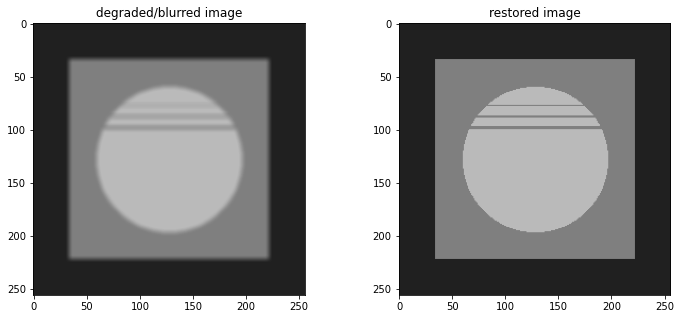

In [14]:
#Inverse filter
#F_hat = G/H
F_hat = np.divide(G,H)

f_hat = ifftn(F_hat).real

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(g, cmap="gray", vmin=0, vmax=255); plt.title("degraded/blurred image")
plt.subplot(122)
plt.imshow(f_hat, cmap="gray", vmin=0, vmax=255); plt.title("restored image")